In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
img = cv2.imread("..\\leaves.jpg",cv2.IMREAD_UNCHANGED)
logo = cv2.imread("..\\opencv_logo.png",cv2.IMREAD_UNCHANGED)

In [5]:
logo_rgb = cv2.cvtColor(logo,cv2.COLOR_BGRA2RGBA)

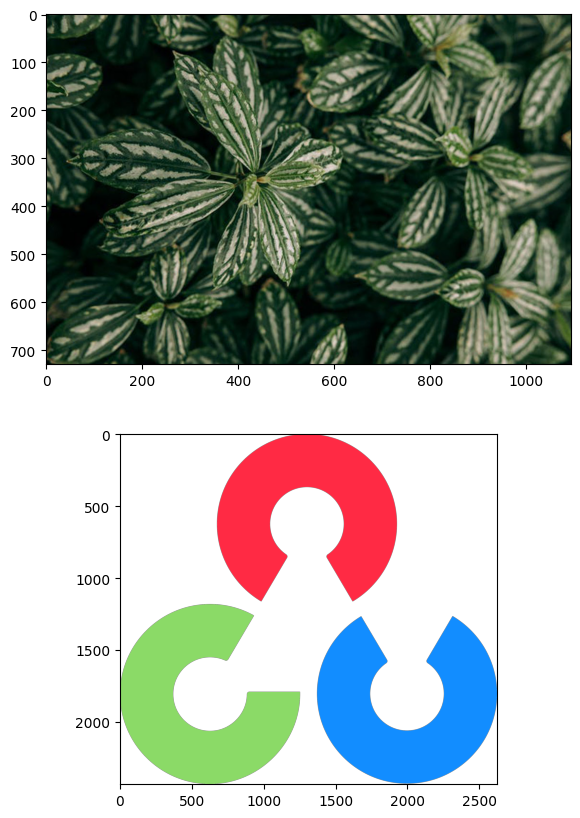

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(211);plt.imshow(img[:,:,::-1])
plt.subplot(212);plt.imshow(logo_rgb)
plt.show()

In [9]:
logo_h,logo_w,_ = logo.shape


In [10]:
img_h,img_w,_ = img.shape

In [11]:
print(f"Image height is {img_h} and width is {img_w}")

Image height is 730 and width is 1094


In [12]:
print(f"Logo height is {logo_h} and width is {logo_w}")

Logo height is 2436 and width is 2623


In [13]:
#Resizing the logo
logo_resized = cv2.resize(logo,None,fx=0.1,fy=0.1,interpolation = cv2.INTER_LINEAR)

In [14]:
logo_h,logo_w,_ = logo_resized.shape

In [15]:
print(f"Logo height is {logo_h} and width is {logo_w}")

Logo height is 244 and width is 262


In [16]:
#Separating the Alpha and Color
logo_bgr = logo_resized[:,:,0:3]
logo_alpha = logo_resized[:,:,3]

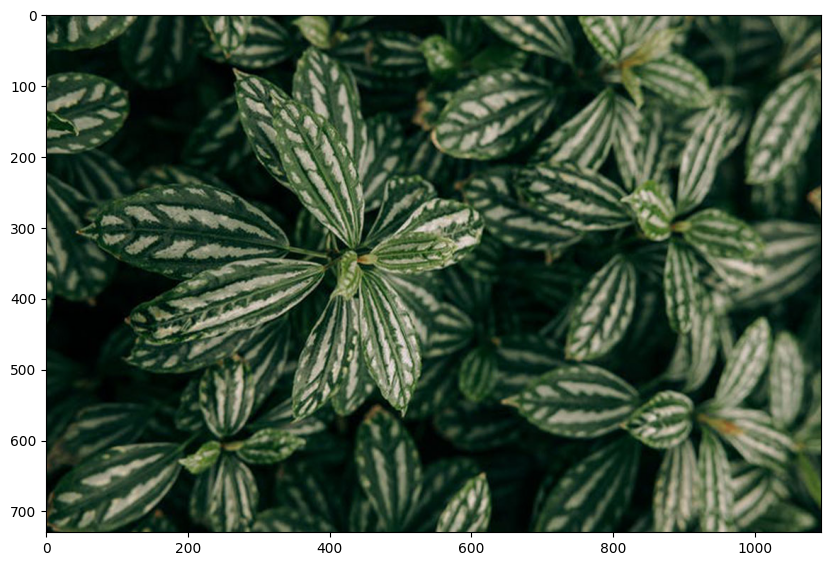

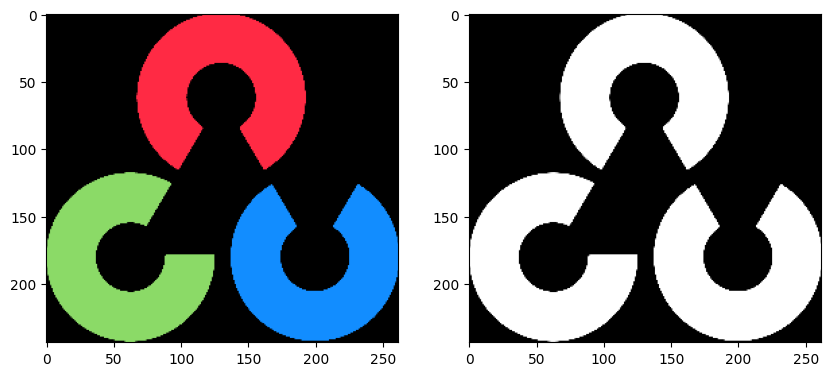

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])
plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(logo_bgr[:,:,::-1])
plt.subplot(122);plt.imshow(logo_alpha,cmap='gray')
plt.show()

In [19]:
cx = int(img_w/2)
cy = int(img_h/2)

In [24]:
tlc_x = int(cx-(logo_w/2))
tlc_y = int(cy-(logo_h/2))

In [25]:
brc_x = int(cx+(logo_w/2))
brc_y = int(cy+(logo_h/2))

In [26]:
roi = img[tlc_y:brc_y,tlc_x:brc_x]

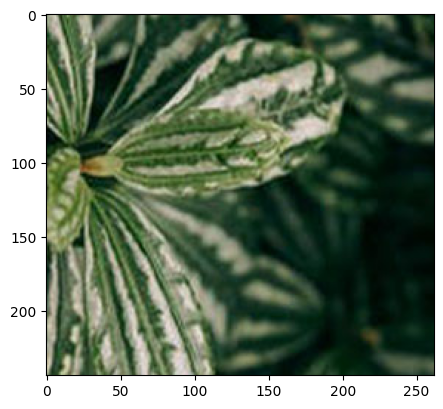

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(roi[:,:,::-1])

In [28]:
alpha_layer = cv2.merge([logo_alpha,logo_alpha,logo_alpha])

In [29]:
inv_masking = cv2.bitwise_not(alpha_layer)

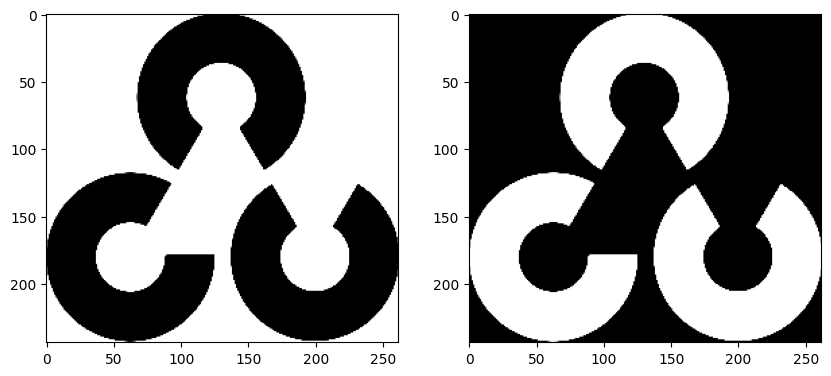

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(inv_masking)
plt.subplot(122);plt.imshow(alpha_layer)

In [32]:
roi_masking = cv2.bitwise_and(roi,inv_masking)
logo_masking = cv2.bitwise_and(logo_bgr,alpha_layer)

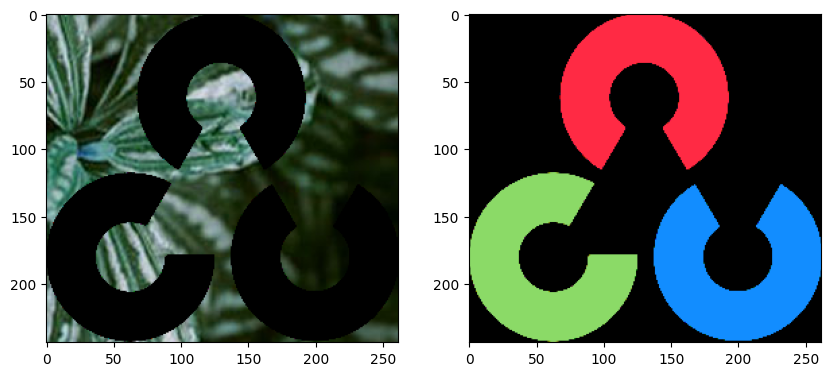

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(roi_masking)
plt.subplot(122);plt.imshow(logo_masking[:,:,::-1])

In [35]:
roi_final = cv2.bitwise_or(logo_masking,roi_masking)

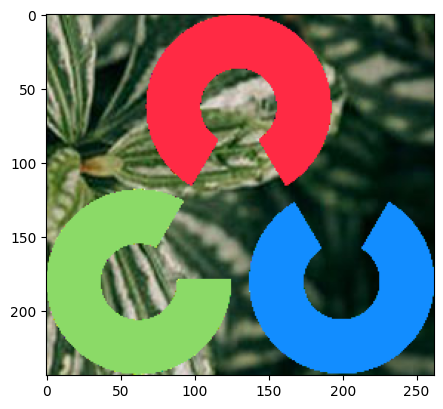

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(roi_final[:,:,::-1])

In [38]:
roi_1 = roi.copy()

In [39]:
img_1 = img.copy()

In [40]:
img_1[tlc_y:brc_y,tlc_x:brc_x] = roi_final

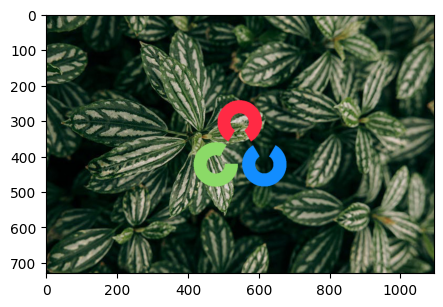

In [41]:
plt.figure(figsize=(5,5))
plt.imshow(img_1[:,:,::-1])

In [60]:
roi_final_2 = cv2.addWeighted(roi_1,1,logo_masking,0.6,0)

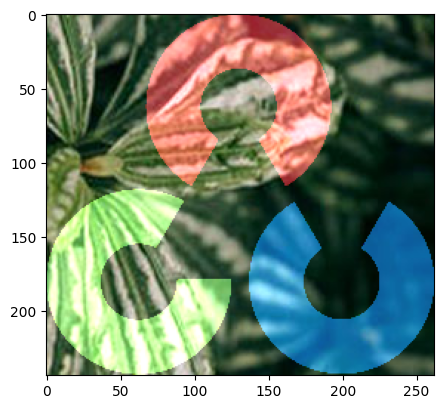

In [61]:
plt.figure(figsize=(5,5))
plt.imshow(roi_final_2[:,:,::-1])

In [62]:
img_2[tlc_y:brc_y,tlc_x:brc_x] = roi_final_2

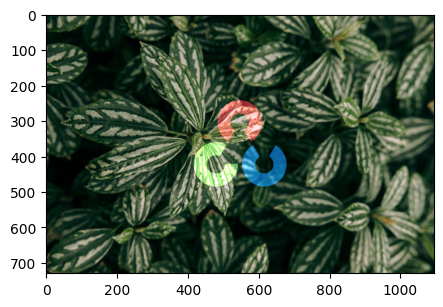

In [63]:
plt.figure(figsize=(5,5))
plt.imshow(img_2[:,:,::-1])

In [64]:
cv2.imwrite("WaterMarked.jpg",img_2)

True

In [ ]:
Image("WaterMarked.jpg")